In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

# FRANKS_PALADIN_HEALTH = 192
# PALADIN_HEALTH_WITH_BLOODLINES = 180
# PALADIN_HEALTH_WITHOUT_BLOODLINES = 160
INITIAL_ENEMY_NUMBER = 10
MAXIMUM_ENEMY_NUMBER = 100
DEFAULT_PALADIN_ATTACK = 18
DEFAULT_PALADIN_NORMAL_ARMOR = 5
DEFAULT_PALADIN_PIERCE_ARMOR = 7

soldiers_info = pd.read_csv('soldiers.csv')
col_to_list = soldiers_info['enemy_type'].tolist()
str = ', '.join(col_to_list)
print("We have these enemy types to select: " + str)

enemy_type = input("Enter the enemy type: ")

def hits_to_kill(enemy_type, PALADIN_HEALTH):
    """Calculate how many hits will need to kill the opponent
    :return: the number of hits to kill a paladin and the number of hits to kill a enemy
    >>> hits_to_kill('Hussar', 192)
    (32, 7)
    """
    attack_type = soldiers_info.loc[soldiers_info['enemy_type'] == enemy_type, "attack_type"].item()
    attack = soldiers_info.loc[soldiers_info['enemy_type'] == enemy_type, 'attack'].item()
    health = soldiers_info.loc[soldiers_info['enemy_type'] == enemy_type, 'health'].item()
    normal_armor = soldiers_info.loc[soldiers_info['enemy_type'] == enemy_type, 'normal_armor'].item()
    pierce_armor = soldiers_info.loc[soldiers_info['enemy_type'] == enemy_type, 'pierce_armor'].item()
    if attack_type == 'normal':
        hits_can_take = PALADIN_HEALTH / (attack - DEFAULT_PALADIN_NORMAL_ARMOR)
        hits_to_kill_enemy = health / (DEFAULT_PALADIN_ATTACK - normal_armor)
    elif attack_type == 'pierce':
        hits_can_take = PALADIN_HEALTH / (attack - DEFAULT_PALADIN_PIERCE_ARMOR)
        hits_to_kill_enemy = health / (DEFAULT_PALADIN_ATTACK - normal_armor)
    hits_can_take = math.ceil(hits_can_take)
    hits_to_kill_enemy = math.ceil(hits_to_kill_enemy)
    return hits_can_take, hits_to_kill_enemy


def simNGames(number_of_simulations, PALADIN_NUMBER, ENEMY_NUMBER, enemy_type, PALADIN_HEALTH):
    """Run the simulation multiple times and count the win rate
    :return: win rate of a certain number of paladins against a certain number of enemies
    """
    winsP = winsE = 0
    for i in range(number_of_simulations):
        win = simOneGame(PALADIN_NUMBER, ENEMY_NUMBER, enemy_type, PALADIN_HEALTH)
        if win == 1:
            winsP = winsP + 1
        else:
            winsE = winsE + 1
    win_rate = winsP / number_of_simulations
    return win_rate


def simOneGame(PALADIN_NUMBER, ENEMY_NUMBER, enemy_type, PALADIN_HEALTH):
    """Simulation of a battle
    :return: 1 means paladins win, 0 means the enemy wins
    >>> simOneGame(1, 2, 'Hussar', 192)
    1
    """
    hits_can_take, hits_to_kill_enemy = hits_to_kill(enemy_type, PALADIN_HEALTH)
    p = {}
    e = {}
    for i in range(ENEMY_NUMBER):
        e[i] = hits_to_kill_enemy
    for i in range(PALADIN_NUMBER):
        p[i] = hits_can_take
    win = fight(p, e)
    return win


def fight(p, e):
    """Using two dictionaries to simulate the rounds in a battle
    :return: 1 means paladins win, 0 means the enemy wins
    """
    while checkwin(p, e) is False:
        paladin_targets = []
        enemies_targets = []
        for i in range(len(p.keys())):
            foes = list(e.keys())
            paladin_targets.append(random.choice(foes)) # Each solider randomly pick a foe and decrease its health
        for i in range(len(e.keys())):
            foes = list(p.keys())
            enemies_targets.append(random.choice(foes))
        for t in paladin_targets:
            e[t] = e[t] - 1
        for t in enemies_targets:
            p[t] = p[t] - 1
        p, e = checkdeath(p, e) # Check if any soldier died in last round
        if bool(p): # Check if one party has been wiped out
            win = 1
        else:
            win = 0
    return win


def checkdeath(p, e):
    """Check if any soldier died in last round. Remove dead soldiers from dictionaries
    :return: dictionaries with dead soldiers removed
    >>> checkdeath({0: 1, 1: 0}, {0: 3, 1: 4, 2: 2})
    ({0: 1}, {0: 3, 1: 4, 2: 2})
    """
    if any(y <= 0 for y in p.values()):
        p = {x: y for x, y in p.items() if y > 0}
    if any(y <= 0 for y in e.values()):
        e = {x: y for x, y in e.items() if y > 0}
    return p, e


def checkwin(p, e):
    """Check if one party has been wiped out. If a dictionary is empty, that means all soldiers are dead
    >>> checkwin({}, {0: 3, 1: 4, 2: 2})
    True
    >>> checkwin({0: 1, 1: 0}, {0: 3, 1: 4, 2: 2})
    False
    """
    if bool(p) and bool(e):
        return False
    else:
        return True


def draw_graph(paladin_health, initial_enemy_number, maximum_enemy_number):
    dictionary = {}
    for enemy_number in range(initial_enemy_number, maximum_enemy_number, 1):
        win_rate = simNGames(number_of_simulations_run, Paladin_number, enemy_number, enemy_type, paladin_health)
        dictionary[enemy_number] = win_rate
    graph = plt.plot(list(dictionary.keys()), list(dictionary.values()))
    graph = plt.xlabel('Enemy number')
    graph = plt.ylabel('Win rate')


We have these enemy types to select: Champion, Halberdier, Paladin, Elite_War_Elephant, Hussar, Arbalester, Hand_Cannoneer, Heavy_Cavalry_Archer
Enter the enemy type: Arbalester


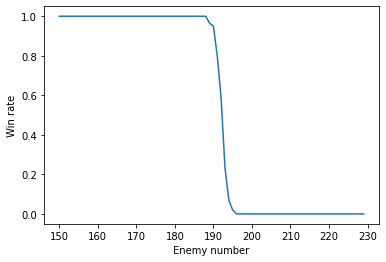

In [2]:
if __name__ == '__main__':
    number_of_simulations_run = 200
    Paladin_number = 40
    PALADIN_HEALTH_WITHOUT_BLOODLINES = 160
    FRANKS_PALADIN_HEALTH = 192
    initial_enemy_number = 150
    maximum_enemy_number = 230
    draw_graph(PALADIN_HEALTH_WITHOUT_BLOODLINES, initial_enemy_number, maximum_enemy_number)

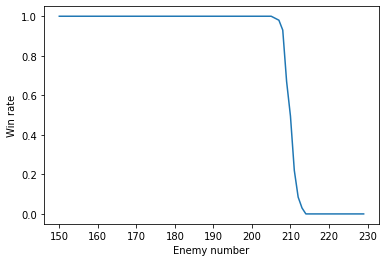

In [3]:
    draw_graph(FRANKS_PALADIN_HEALTH, initial_enemy_number, maximum_enemy_number)